In [11]:
# Importing the libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [12]:
# define f0.5 score
from sklearn.metrics import fbeta_score, make_scorer
f05_score = make_scorer(fbeta_score, beta=0.5)

In [13]:
def compareAlgorithmsForBarChart(X_train, y_train):
    # Compare Algorithms
    import pandas
    from sklearn.model_selection import StratifiedKFold
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('ADABOOST', AdaBoostClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    auc_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        auc_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring='roc_auc')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        print(recall_results)    # for testing only
        auc_results.append(auc_cv_results.mean())
        print(auc_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, auc_results, f05_results, names

In [14]:
def plotPrecisionRecallCurves(X_train, X_test, y_train, y_test):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('ADABOOST', AdaBoostClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    
    names = []
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        plot_precision_recall_curve(model, X_test, y_test, ax = plt.gca(), name = name)
        
    plt.title('Precision-Recall curve')

In [15]:
def barChart(results, score):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = ['LR', 'SVM', 'Linear SVM', 'AdaBoost', 'GBM', 'DT']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects = ax.bar(x , results, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    #ax.legend()

    fig.tight_layout()

    plt.show()

In [16]:
def compareWithBarChart(originalResults, riskFactorResults, score):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = ['LR', 'SVM', 'Linear SVM', 'AdaBoost', 'GBM', 'DT']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, originalResults, width, label='Original Dataset')
    rects2 = ax.bar(x + width/2, riskFactorResults, width, label='Risk Factor Dataset')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()




    fig.tight_layout()

    plt.show()

In [17]:
def compareWithBarChart(precisionResults, riskFactorResults, score):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = ['LR', 'SVM', 'Linear SVM', 'AdaBoost', 'GBM', 'DT']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, originalResults, width, label='Original Dataset')
    rects2 = ax.bar(x + width/2, riskFactorResults, width, label='Risk Factor Dataset')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()




    fig.tight_layout()

    plt.show()

In [18]:
# make stratified folds for cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=False)

# make feature matrix and target matrix
X = pd.read_csv("featuresMatrix_Preprocessed_OHEColumnsNamed.csv")
y = pd.read_csv("dependentVariableLGAEncoded.csv")

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [21]:
y.value_counts(normalize=True)*100

0
0    96.938776
1     3.061224
dtype: float64

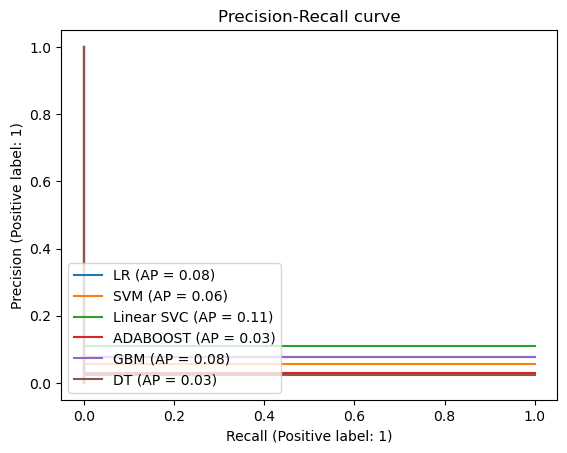

In [37]:
plotPrecisionRecallCurves(X_train, X_test, y_train, y_test)

In [ ]:
y.value_counts()

0
0    190
1      6
dtype: int64

In [ ]:
y.value_counts(normalize = True)*100

0
0    96.938776
1     3.061224
dtype: float64

In [ ]:
import warnings
#ignore warnings 
warnings.filterwarnings("ignore")

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

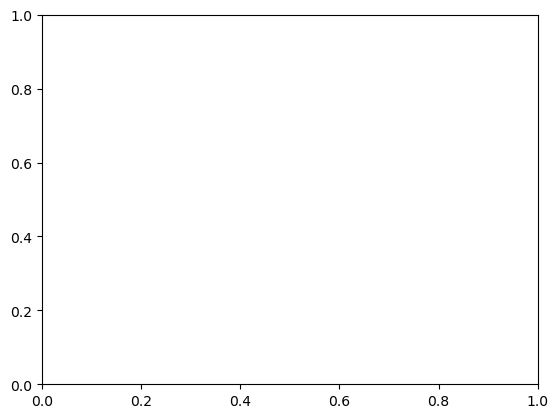

In [ ]:
precision_results, recall_results, auc_results, f05_results, names = compareAlgorithmsForBarChart(X_train,y_train)

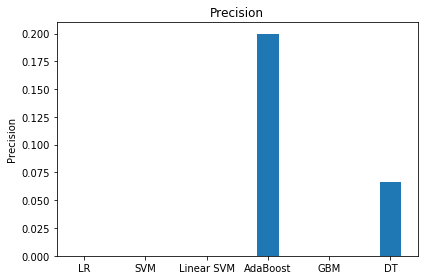

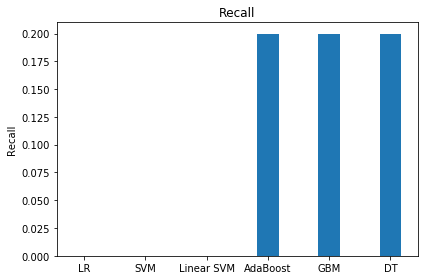

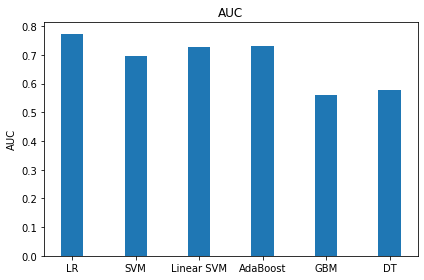

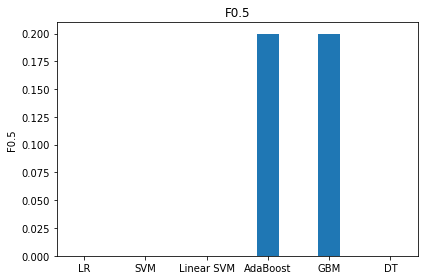

In [10]:
barChart(precision_results, "Precision")
barChart(recall_results, "Recall")
barChart(auc_results, "AUC")
barChart(f05_results, "F0.5")